# Victor Moraes - 2016027600
![q1](imgs/q1.png)  



$$ |H(j\omega)|^2 = H(j\omega) . H^* (j\omega)$$
$$ |H(j\omega)|^2 = H(j\omega) . H (-j\omega)$$
$$ js=s$$
$$ |H(s)|^2 = H(s) . H (-s)$$
$$ |H(s)|^2 = {1 \over 1 + (s/\omega_c)^N} . {1 \over 1 - (s/\omega_c)^N}$$
### a) Função de transferência:
$$ |H(s)|^2 = {1 \over 1 + (s/\omega_c)^{2N}}$$
$$ |H(s)|^2 = {1 \over 1 + (s/700.\pi)^{14}}$$
a) Polos:
$$ 1+ (s/\omega_c)^{2N} = 0$$  
$$ (s/\omega_c)^N = (-1)$$
$$ s = \omega_c (-1)^{1/2N}  $$
$$ s = 700\pi(-1)^{1/14}  $$
$$ p_k = -700\pi \angle {2\pi k \over 14},  k \in [0,13]$$



$$ H_n(s) = {1 \over \prod (s - p_k)  } $$
Zeros: não possui zeros do polinômio do numerador.




b) Bibliotecas:

In [1]:
from sigproc_lib import *

Determinação do polinômio de:$$ H(s) $$


Polos de $$ |H(s)|^2 = {700\pi^{14} \over 700\pi^{14} + (s)^{14}}$$

Polo 0 = (-2144+489j)
Polo 1 = (-2144-489j)
Polo 2 = (-1719+1371j)
Polo 3 = (-1719-1371j)
Polo 4 = (-954+1981j)
Polo 5 = (-954-1981j)
Polo 6 = 2199j
Polo 7 = -2199j
Polo 8 = (954+1981j)
Polo 9 = (954-1981j)
Polo 10 = (2144+489j)
Polo 11 = (2144-489j)
Polo 12 = (1719+1371j)
Polo 13 = (1719-1371j)


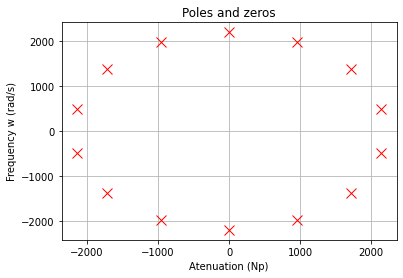

In [2]:
Wc = (700*pi)
num = np.poly1d([Wc**14])
# Normalizado para evitar erro numerico:
den= np.poly1d([1,0,0,0,0,0,0,0,0,0,0,0,0,0,Wc**14])  

sys = signal.TransferFunction(num,den)
z,p,k = signal.tf2zpk(num,den)
#p=np.singlecomplex(wc*p)
[print(f"Polo {i} = {round(p[i])}") for i, pole in enumerate(p)]
plot_zpk(z,p,k)


Determinação de $$ H_n(s) $$
Apenas polos do plano negativo utilizando buttap(N):

Normalizado:
Zeros=
[],
Polos=
[ -489.3491+2143.9785j  -1371.1257+1719.3373j  -1981.334  +954.16016j
 -2199.1147   -0.j      -1981.334  -954.16016j -1371.1257-1719.3373j
  -489.3491-2143.9785j ],
Ganho=
2.4873413456829807e+23


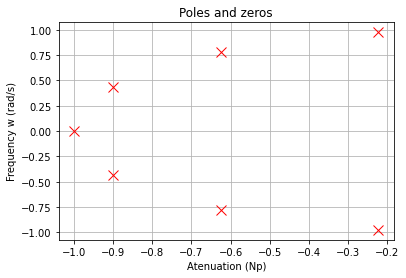

In [11]:
z,p,k = signal.buttap(7)
print(f"Normalizado:\nZeros=\n{zb},\nPolos=\n{pb},\nGanho=\n{kb}")
plot_zpk(z,p,k)


Escalonamento de freqência:
Zeros=
[],
Polos=
[ -489.3491+2143.9785j  -1371.1257+1719.3373j  -1981.334  +954.16016j
 -2199.1147   -0.j      -1981.334  -954.16016j -1371.1257-1719.3373j
  -489.3491-2143.9785j ],
Ganho=
2.4873413456829807e+23


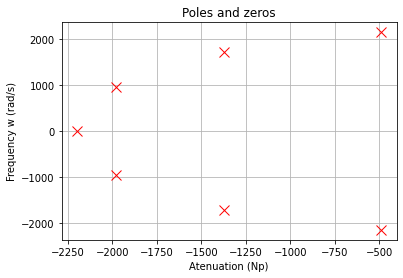

In [4]:
zb,pb,kb = signal.buttap(7)
kb = float(Wc**7)
#kb=np.format_float_scientific(kb,precision=2)
pb=np.singlecomplex(Wc*pb)
#pb = pb.round(2)

print(f"Escalonamento de freqência:\nZeros=\n{zb},\nPolos=\n{pb},\nGanho=\n{kb}")
plot_zpk(zb,pb,kb )


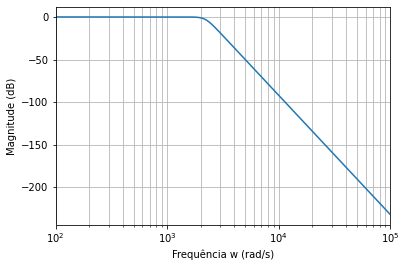

In [5]:
f = np.logspace(2,5,1000)
#tf_mag = lambda x: float(20*log(1/(1 + (x/(700*pi))**14), 10))
#mag = np.vectorize(tf_mag)(f)
f, mag, phase = signal.bode((zb,pb,kb ),f)

plt.xlim([1e2,1e5])
plt.xlabel("Frequência w (rad/s)")
#plt.ylim([-260,10])
plt.ylabel("Magnitude (dB)")
plt.grid(True, color = '0.7', linestyle='-', which='both', axis='both')
plt.semilogx(f, mag)    # Bode magnitude plot

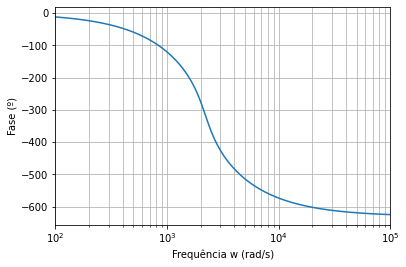

In [6]:
phase2 = phase
plt.xlim([1e2,1e5])
plt.xlabel("Frequência w (rad/s)")
#plt.ylim([-260,10])
plt.ylabel("Fase (º)")
plt.grid(True, color = '0.7', linestyle='-', which='both', axis='both')
plt.semilogx(f, phase2)    # Bode magnitude plot

In [7]:
def H(s):
    return np.prod([Wc/abs(s-pk) for pk in pb])

H(complex(0,0))

0.9999999768106139

In [8]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab
import numpy as np
import mpmath
mpmath.dps = 5

def plot_surf(f):
    fig = pylab.figure()
    ax = Axes3D(fig)
    X = np.arange(-3000, 0, 50)
    Y = np.arange(-3000, 3000, 50)
    X, Y = np.meshgrid(X, Y)
    xn, yn = X.shape
    W = X*0
    for xk in range(xn):
        for yk in range(yn):
            try:
                z = complex(X[xk,yk],Y[xk,yk])
                w = float(f(z))
                if w != w:
                    raise ValueError
                W[xk,yk] = w
            except (ValueError, TypeError, ZeroDivisionError):
                # can handle special values here
                pass
        #print (xk, xn)

    # can comment out one of these
    #ax.set_zlim3d(0, 100)
    #ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet)
    Z = np.clip(W,0,100)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
    #ax.contourf(X, Y, W, zdir='z', offset=-2, cmap=plt.cm.hot)
    ax.set_zlim(0, 100)
    #ax.plot_wireframe(X, Y, W, rstride=5, cstride=5)

    pylab.show()

In [48]:
%matplotlib widget

In [33]:
plot_surf(H)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![q5](imgs/surf_butter.png)  




![q2](imgs/q2.png)

Escalonamento de frequência:

$$ k_f = f_1/f_0 = 5000/350 $$

In [34]:
Wc= float(2 * pi * 350)
kf = 5000/350
kf

14.285714285714286

Escalonamento de freqência:
Zeros=
[],
Polos=
[ -6990.701+30628.264j -19587.51 +24561.96j  -28304.771+13630.859j
 -31415.926    -0.j    -28304.771-13630.859j -19587.51 -24561.96j
  -6990.701-30628.264j],
Ganho=
3.0202932277767917e+31
Wc=31415.926535897932


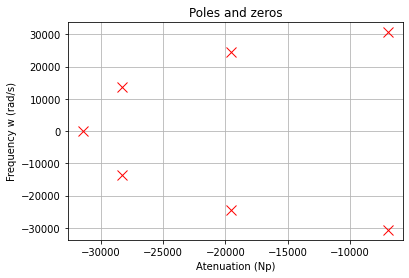

In [37]:
zb,pb,kb = signal.buttap(7)
kf = 5000/350
Wc= float(2 * pi * 350 * kf)
kb = float(Wc**7)
#kb=np.format_float_scientific(kb,precision=2)
pb=np.singlecomplex(Wc*pb)
#pb = pb.round(2)

print(f"Escalonamento de freqência:\nZeros=\n{zb},\nPolos=\n{pb},\nGanho=\n{kb}\nWc={Wc}")
plot_zpk(zb,pb,kb )

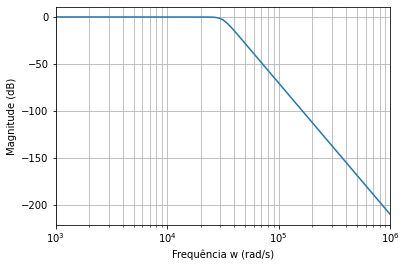

In [43]:
f = np.logspace(3,6,1000)
#tf_mag = lambda x: float(20*log(1/(1 + (x/(700*pi))**14), 10))
#mag = np.vectorize(tf_mag)(f)
f, mag, phase = signal.bode((zb,pb,kb ),f)

plt.xlim([1e3,1e6])
plt.xlabel("Frequência w (rad/s)")
#plt.ylim([-260,10])
plt.ylabel("Magnitude (dB)")
plt.grid(True, color = '0.7', linestyle='-', which='both', axis='both')
plt.semilogx(f, mag)    # Bode magnitude plot

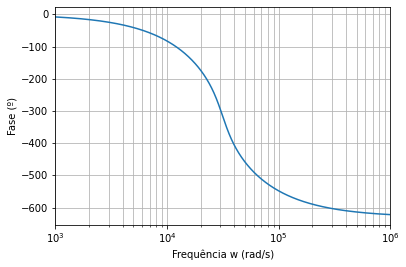

In [44]:
phase2 = phase
plt.xlim([1e3,1e6])
plt.xlabel("Frequência w (rad/s)")
#plt.ylim([-260,10])
plt.ylabel("Fase (º)")
plt.grid(True, color = '0.7', linestyle='-', which='both', axis='both')
plt.semilogx(f, phase2)    # Bode magnitude plot

In [45]:
def H(s):
    return np.prod([Wc/abs(s-pk) for pk in pb])

H(complex(0,0))

1.0000000259473174

In [46]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab
import numpy as np
import mpmath
mpmath.dps = 5

def plot_surf(f):
    fig = pylab.figure()
    ax = Axes3D(fig)
    X = np.arange(-40000, 0, 100)
    Y = np.arange(-40000, 40000, 100)
    X, Y = np.meshgrid(X, Y)
    xn, yn = X.shape
    W = X*0
    for xk in range(xn):
        for yk in range(yn):
            try:
                z = complex(X[xk,yk],Y[xk,yk])
                w = float(f(z))
                if w != w:
                    raise ValueError
                W[xk,yk] = w
            except (ValueError, TypeError, ZeroDivisionError):
                # can handle special values here
                pass
        #print (xk, xn)

    # can comment out one of these
    #ax.set_zlim3d(0, 100)
    #ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap=cm.jet)
    Z = np.clip(W,0,100)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
    #ax.contourf(X, Y, W, zdir='z', offset=-2, cmap=plt.cm.hot)
    ax.set_zlim(0, 100)
    #ax.plot_wireframe(X, Y, W, rstride=5, cstride=5)

    pylab.show()

In [ ]:
plot_surf(H)

![q5](imgs/q2_c.png)  


![q3](imgs/q3.png)
![q3](imgs/q3_b.png#center)

In [4]:
poles = np.around(1e6 * np.array([8, -8, 1]),5)
poles

array([ 8000000., -8000000.,  1000000.])

$$ n=4,~ \omega_p = 1 ~rad/s, \alpha_p = 60 ~dB $$
$$ C_n = { 8\omega^5 -8\omega^2 + 1 } $$
$$ \epsilon = { \sqrt{10^{\alpha/10}-1}} = 0.99762834511$$
$$ |H(s)|^2 = { 1 \over 1 + \epsilon^2 *(8\omega^4 -8\omega^2 + 1) }$$
$$ \epsilon^2 = { 10^{\alpha/10}-1} = 0.99526231496$$

$$ |H(s)|^2 = { 1 \over 1+ 0.99526231496*(8\omega^4 -8\omega^2 + 1)}$$
$$ |H(s)|^2 = { 1 \over 1.99526231496 + 7.96209851975 (\omega^4 -\omega^2)}$$


In [28]:
p = np.roots([7.96209851975, 0, -7.96209851975, 0, 1.99526231496])
k=1/7.96209851975
p


array([-0.707317+0.01724349j, -0.707317-0.01724349j,
        0.707317+0.01724349j,  0.707317-0.01724349j])

$$ |H(s)|^2 = { 1 \over 1.99526231496 + 7.96209851975 (\omega^4 -\omega^2)}$$

$$ \omega_p = $$
$$[-0.707316999672518 - 0.0172434922719683*I ,$$
 $$-0.707316999672518 + 0.0172434922719683*I ,  $$
  $$ 0.707316999672518 - 0.0172434922719683*I, $$
 $$0.707316999672518 + 0.0172434922719683*I] $$ 


 Para H(s):

 $$ \omega_p = $$
$$[-0.707316999672518 - 0.0172434922719683*I ,$$
 $$-0.707316999672518 + 0.0172434922719683*I ]  $$

$$ H(s) = {1 \over \prod (s - p_k)  } $$



In [32]:
z=[]
tf = signal.zpk2tf(z,p[0:2],k)
tf


(array([0.000125]), array([1.        , 1.414634  , 0.50059468]))

$$ H(s) = { 0.000125 \over \omega^2 +1.414634\omega^2 + 0.50059468}$$

In [24]:
z, p, k  = signal.cheb1ap(4, 60)
tf = signal.zpk2tf(z,p,k)
num, den = signal.zpk2tf(z, p, k)
sys = signal.TransferFunction(num, den)
sys

TransferFunctionContinuous(
array([0.000125]),
array([1.00000000e+00, 6.53281707e-04, 1.00000021e+00, 4.22311785e-04,
       1.25000063e-01]),
dt: None
)

Função de transferencia:

$$ T_f = { {0.000125} \over {1.0 x^{4} + 0.000653 x^{3} + 1.0 x^{2} + 0.000422 x + 0.125} }$$



Os coeficientes do denominador diferem em $ 0.000653 x^{3} + 0.000422 x $ que são termos que podem ser desprezados. Pode-se concluir que a implementação de cheblap é uma aproximação do polinomio real.


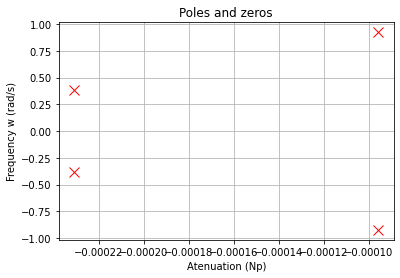

In [6]:
plot_zpk(z,p,k)

In [9]:
from  sympy import *
den_r = den.round(6)
num_r = num.round(6)
x = symbols('x')
tf = Poly(num_r, x)/Poly(den_r, x)


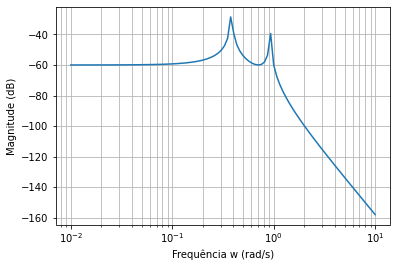

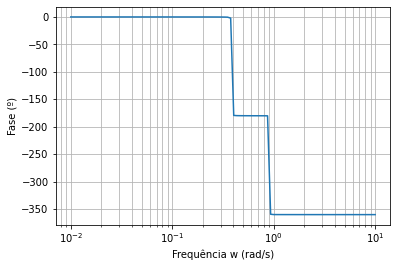

In [21]:
f = np.logspace(3,6,1000)
#tf_mag = lambda x: float(20*log(1/(1 + (x/(700*pi))**14), 10))
#mag = np.vectorize(tf_mag)(f)
f, mag, phase = signal.bode((z,p,k ))
plt.figure()
#plt.xlim([1e3,1e6])
plt.xlabel("Frequência w (rad/s)")
#plt.ylim([-260,10])
plt.ylabel("Magnitude (dB)")
plt.grid(True, color = '0.7', linestyle='-', which='both', axis='both')
plt.semilogx(f, mag)    # Bode magnitude plot


plt.figure()
phase2 = phase
#plt.xlim([1e3,1e6])
plt.xlabel("Frequência w (rad/s)")
#plt.ylim([-260,10])
plt.ylabel("Fase (º)")
plt.grid(True, color = '0.7', linestyle='-', which='both', axis='both')
plt.semilogx(f, phase2)    # Bode magnitude plot

![q4](imgs/q4_a.png)
![q4b](imgs/q4_b.png)


Insira a ordem do filtro passa baixas:


37840.2809837298*pi
[1.00000000e-03 0.00000000e+00 2.82643138e+07]
[1.00000000e+00 7.51479201e+03 2.82643138e+07]
[-0.+168119.93875773j  0.-168119.93875773j]
[-3757.39600615+3761.15528274j -3757.39600615-3761.15528274j]
1


(array([-3757.39600615+3761.15528274j, -3757.39600615-3761.15528274j]),
 array([0., 0.]),
 array([180., 180.]))

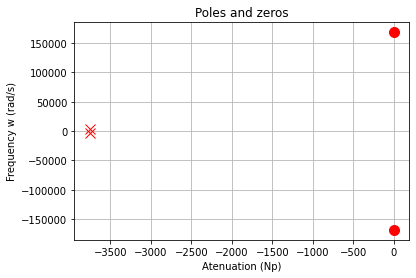

<Figure size 432x288 with 0 Axes>

In [54]:
print('Insira a ordem do filtro passa baixas:\n\n')
n=2
#n = input();

wp = 1000*pi;
Rp = 0.5;
Rs = 60;

eps = 1/(sqrt(10**(Rs/10)-1));

ws = wp*cosh((1/n)*acosh(1/(eps*(sqrt(10**(Rp/10)-1)))))
print(ws)
num, den = cheby2(n, Rs, ws, analog=True)
print(num)
print(den)

z = np.roots(num)
p = np.roots(den)
k=1
print(z)
print(p)
print(k)
plot_zpk(z,p,k)
H = signal.TransferFunction(num, den)

figure (1)

figure (2)
signal.bode(z,p,k)

![q5](imgs/q5.png)


![q6](imgs/q6.png)


$$ |H(s)|^2 = { 1 \over 1 + \epsilon^2 *(4w^3-3w) }$$
$$$$

![q7](imgs/q7.png)


a) Filtros Ativos permitem ganho maior que 1; possuem caracteristicas de amplificadores ideiais: alta impedância de entrada, baixa impedância de saída, o que permite concatenar vários estágios, sem perda de ganho.

b) Passivos são necessários onde uma a faixa de resposta é muito larga, como em aplicações RF e nanoeletrônica/ processadores, sendo que em ambos a faixa de operação é em GHz. Isso se deve ao fato de amplificadores possuirem uma banda de passagem mais restrita que componentes discretos.

![q8](imgs/q8.png)
![q8_b](imgs/q8_b.png)


In [58]:
wp = 1000*pi
Rp = 2
Rs = 40

eps = 1/(sqrt(10**(Rs/10)-1))
for n in range(1,20):
    Bs = wp*cosh((1/n)*acosh(1/(eps*(sqrt(10**(Rp/10)-1)))))/(2*pi)
    print( f"n={n}, Bs= {Bs}")    
    if Bs < 9e3:
        break
print( f"n={n}")

n=1, Bs= 65374.7445965484
n=2, Bs= 4058.16290322815
n=2
